# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Ramicane have the far less tumor volume at the end of their drug regimen compared to infubinol and ceftamin (box plot)
- Capomulin Treatment was effective for reducing tumor volume in Mouse s185 (line plot)
- There were slightly more male then female mice (pie chart)
 

In [70]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [88]:
# Checking the number of mice.
print(f"Number of mice: {merged_data['Mouse ID']}")

Number of mice: 0       k403
1       k403
2       k403
3       k403
4       k403
        ... 
1888    z969
1889    z969
1890    z969
1891    z969
1892    z969
Name: Mouse ID, Length: 1893, dtype: object


In [72]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicated_mice = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]


In [90]:
# Optional: Get all the data for the duplicate mouse ID.
print(duplicated_mice)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392        

In [74]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])


In [75]:
# Checking the number of mice in the clean DataFrame.
print(f"Number of unique mice after cleaning: {cleaned_data['Mouse ID'].nunique()}")

Number of unique mice after cleaning: 249


## Summary Statistics

In [76]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# utilized stackoverflow to find .agg which saved so much time
summary_stats = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean="mean",
    Median="median",
    Variance="var",
    Standard_Deviation="std",
    SEM="sem"
)
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_stats

,Mean,Median,Variance,Standard_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [77]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

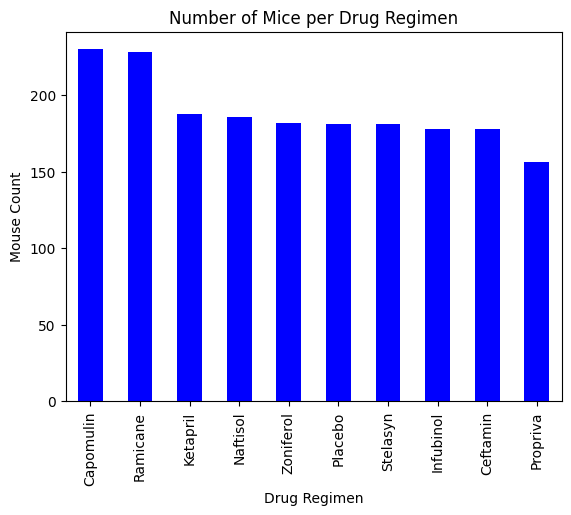

In [78]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_timepoints = cleaned_data["Drug Regimen"].value_counts()
mouse_timepoints.plot(kind='bar', color='blue')
plt.title("Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mouse Count")
plt.show()

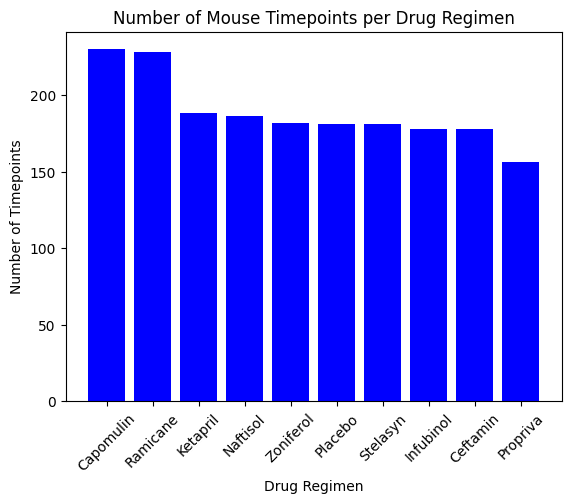

In [79]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot
#reused timepoints code from pandas bar
mouse_timepoints = cleaned_data["Drug Regimen"].value_counts()
plt.bar(mouse_timepoints.index, mouse_timepoints.values, color="blue")  # Creating bar chart (assuming same color doesn't matter)

# Added titles and labels
plt.title("Number of Mouse Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")

# display
plt.xticks(rotation=45)  # Rotated x-axis labels (from random note I took to remember that)
plt.show()


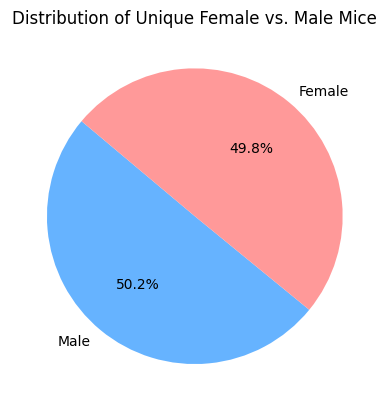

In [80]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
unique_mice_data = cleaned_data.drop_duplicates(subset="Mouse ID")
# Get the unique mice with their gender
gender_distribution = cleaned_data.drop_duplicates(subset="Mouse ID")["Sex"].value_counts()
gender_distribution.plot(kind="pie", autopct="%1.1f%%", startangle=140, colors=["#66b3ff", "#ff9999"]) #color codes and autopct taken from xtert learning assistant
plt.title("Distribution of Unique Female vs. Male Mice")
plt.ylabel("")  # Figured out how to hide y-axis label for a cleaner look
# show the pie chart
plt.show()

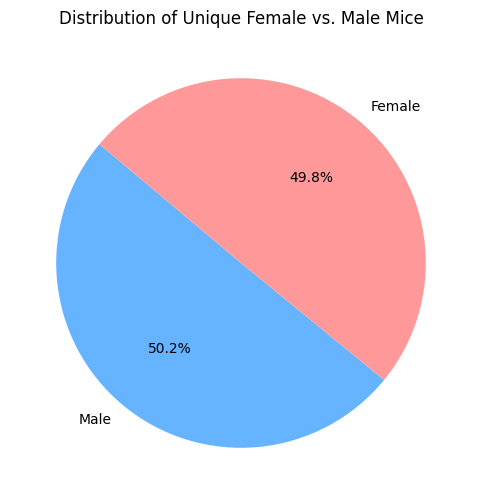

In [81]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
unique_mice_data = cleaned_data.drop_duplicates(subset="Mouse ID") #copied from pandas pie chart
gender_distribution = unique_mice_data["Sex"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct="%1.1f%%", startangle=140, colors=["#66b3ff", "#ff9999"])

plt.title("Distribution of Unique Female vs. Male Mice")

# Make the pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [82]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = cleaned_data.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoints, cleaned_data, on=['Mouse ID', 'Timepoint'])

In [83]:
# Put treatments into a list for for loop (and later for plot labels)
promising_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

for drug in promising_drugs:
    volumes = final_tumor_volume[final_tumor_volume['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    tumor_volumes.append(volumes)

# Calculate the IQR and quantitatively determine if there are any potential outliers.

    quartiles = volumes.quantile([0.25, 0.5, 0.75])
    lowerq, upperq = quartiles[0.25], quartiles[0.75]
    iqr = upperq - lowerq
    # Locate the rows which contain mice on each drug and get the tumor volumes
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    # add subset
   

    # Determine outliers using upper and lower bounds
    outliers = volumes[(volumes < lower_bound) | (volumes > upper_bound)]
    print(f"{drug} outliers:\n{outliers}\n")

Capomulin outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol outliers:
31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)



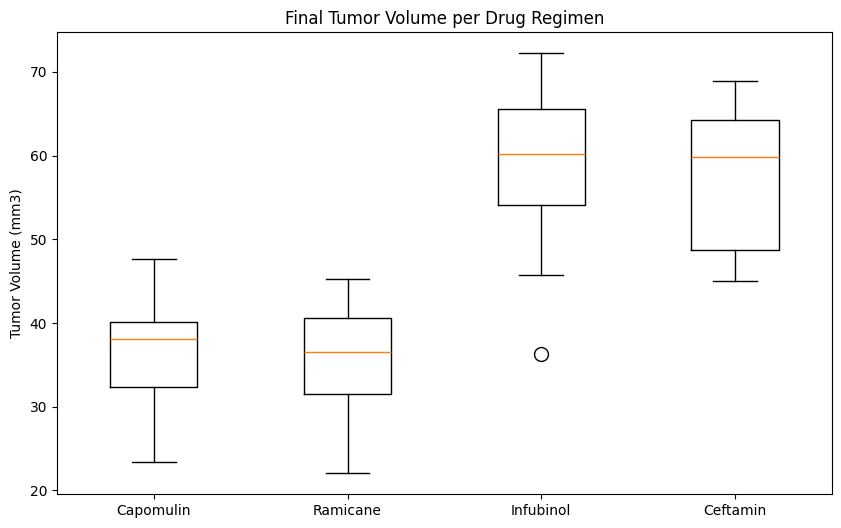

In [84]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volumes, labels=promising_drugs, flierprops=dict(marker='o', color='red', markersize=10))
plt.title("Final Tumor Volume per Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

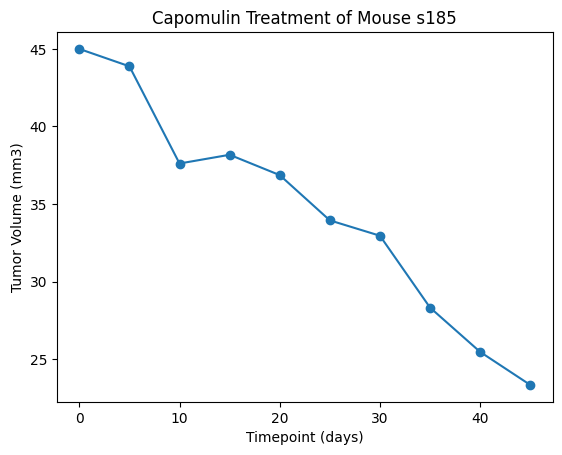

In [85]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]
single_mouse = capomulin_data[capomulin_data["Mouse ID"] == "s185"]
plt.plot(single_mouse["Timepoint"], single_mouse["Tumor Volume (mm3)"], marker='o')
plt.title("Capomulin Treatment of Mouse s185")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

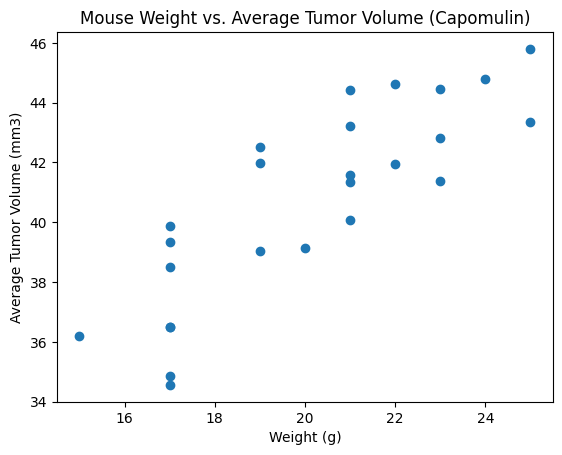

In [86]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_tumor_vol_by_weight = capomulin_data.groupby("Mouse ID").agg( #.agg saves day again
    Avg_Tumor_Vol=("Tumor Volume (mm3)", "mean"),
    Weight=("Weight (g)", "first")
)
plt.scatter(avg_tumor_vol_by_weight["Weight"], avg_tumor_vol_by_weight["Avg_Tumor_Vol"])
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

Correlation coefficient: 0.8419363424694722


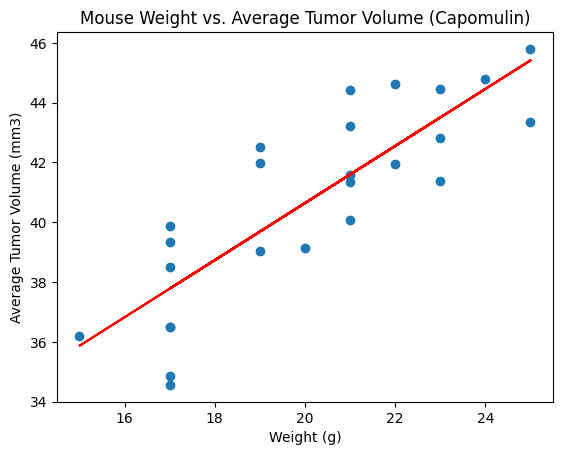

In [87]:
# Calculate the correlation coefficient and a linear regression model
#calculation
correlation = avg_tumor_vol_by_weight["Weight"].corr(avg_tumor_vol_by_weight["Avg_Tumor_Vol"])
print(f"Correlation coefficient: {correlation}")

#linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(
    avg_tumor_vol_by_weight["Weight"], avg_tumor_vol_by_weight["Avg_Tumor_Vol"]
)
regress_values = avg_tumor_vol_by_weight["Weight"] * slope + intercept
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
plt.scatter(avg_tumor_vol_by_weight["Weight"], avg_tumor_vol_by_weight["Avg_Tumor_Vol"])
plt.plot(avg_tumor_vol_by_weight["Weight"], regress_values, color='red')
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()